# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [255]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

In [256]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)


# Import Data

In [258]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [259]:
# Pane 1 Housing Units:  Define Panel Visualization Functions
def housing_units_per_year():
    fig_housing=plt.figure()
    housing_units=sfo_data.loc[:, 'housing_units']
    units_per_year = housing_units.groupby(['year']).mean()
    
    units_per_year.plot(kind='bar', title='Housing Units in San Francisco from 2010 to 2016', figsize=(10,5))
    
    plt.close(fig_housing)
    
    return pn.pane.Matplotlib(fig_housing, tight=True)

pane_one=pn.panel(housing_units_per_year)


In [260]:
# Pane 2: since "def" did not work, changed the plot type to Plotly instead of Matplotlib
ave_price_rent=sfo_data.drop(columns=['neighborhood', 'housing_units'])
ave_price_rent_year = ave_price_rent.groupby(['year']).mean()
ave_price_rent_year.reset_index(inplace = True)
fig_rent = px.line(ave_price_rent_year, x='year', y='gross_rent', width=700, height=400, title="Average Gross Rent by Year")
fig_rent.update_traces(line_color="red")
fig_rent.update_layout(plot_bgcolor="white")
fig_rent.update_yaxes(title_text="Ave Gross Rent")
pane_two=pn.panel(fig_rent)

# Pane 2v1, originally wrote with "def" but, the chart was not shown up on Line 181 to create "Row" for the dashboard. 
def average_gross_rent():
     fig_rent=plt.figure()
     ave_price_rent=sfo_data.drop(columns=['neighborhood', 'housing_units'])
     ave_price_rent_year = ave_price_rent.groupby(['year']).mean()
     ave_price_rent_year.reset_index(inplace = True)
    
     average_gross_rent=ave_price_rent_year.plot(x='year', y="gross_rent", color="red", legend=False, title='Average Gross Rent by Year', figsize=(10,5))
     average_gross_rent.set_xlabel("Year")
     average_gross_rent.set_ylabel("Average Gross Rent")
    
     plt.close(fig_rent)
    
     return pn.pane.Matplotlib(fig_rent, tight=True)

pane_two=average_gross_rent()

In [261]:
# Pane 3: Sale Price: Define Panel Visualization Functions by using Plotly instead of Matplotlib
ave_price_rent=sfo_data.drop(columns=['neighborhood', 'housing_units'])
ave_price_rent_year = ave_price_rent.groupby(['year']).mean()
ave_price_rent_year.reset_index(inplace = True)
average_price_sqr=px.line(ave_price_rent_year, x='year', y='sale_price_sqr_foot', width=700, height=400, title="Average Price per Sqft by Year")
average_price_sqr.update_traces(line_color="purple")
average_price_sqr.update_layout(plot_bgcolor="white")
average_price_sqr.update_yaxes(title_text="Price per SqFt")
pane_three=pn.panel(average_price_sqr)                          

## Pane 3v1 originally wrote with "def" but, the chart was not shown up on Line 181 to create "Row" for the dashboard. 

def average_sales_price():
    fig_sales=plt.figure()
    ave_price_rent=sfo_data.drop(columns=['neighborhood', 'housing_units'])
    ave_price_rent_year = ave_price_rent.groupby(['year']).mean()
    
    average_price_sqr=ave_price_rent_year.plot(y="sale_price_sqr_foot", color="purple", legend=False, title='Average Price per SqFt by Year', figsize=(10,5))
    average_price_sqr.set_xlabel("Year")
    average_price_sqr.set_ylabel("Price per SqFt")
    
    plt.close(fig_sales)
    
    return pn.pane.Matplotlib(fig_sales, tight=True)

pane_three=average_sales_price()
pane_three

In [262]:
# Pane 4 neighborhood: Define Panel Visualization Functions

def average_price_by_neighborhood():
    ave_price_sqr_by_neighborhood=sfo_data.groupby(['year','neighborhood'] ).mean()
    average_price_by_neighborhood = ave_price_sqr_by_neighborhood.hvplot.line(x='year', y='sale_price_sqr_foot', 
    groupby='neighborhood', xlabel='Year', ylabel='Ave. Sale Price per SqFt')

    return average_price_by_neighborhood

In [263]:
# Pane 5 most expensive: Define Panel Visualization Functions
def top_most_expensive_neighborhoods():
    expensive=sfo_data.groupby('neighborhood').mean()
    sorted_expensive=expensive.sort_values(by=['sale_price_sqr_foot'], ascending=False)
    top_ten=sorted_expensive.iloc[0:10]
    
    return top_ten.hvplot.bar(x='neighborhood', y='sale_price_sqr_foot', 
                   title='Top 10 Expensive Neighborhoods in SFO', xlabel='Neighborfood', ylabel='Ave. Sale Price per SqFt'
                  ,rot=90, height=500)


In [264]:
# Pane 6: Define Panel Visualization Functions
def most_expensive_neighborhoods_rent_sales():
    ave_price_sqr_by_neighborhood=sfo_data.groupby(['year','neighborhood'] ).mean()
   
    return ave_price_sqr_by_neighborhood.hvplot.bar(x='year', y=['gross_rent', 'sale_price_sqr_foot'], 
                                         groupby='neighborhood', height=500, width=700, rot=90)


In [265]:
# Pane 7: Define Panel Visualization Functions
def parallel_categories():
        expensive=sfo_data.groupby('neighborhood').mean()
        sorted_expensive=expensive.sort_values(by=['sale_price_sqr_foot'], ascending=False)
        top_ten=sorted_expensive.iloc[0:10]
        top_ten_index=top_ten.reset_index()
        
        plot=px.parallel_categories(top_ten_index,
                       dimensions=['neighborhood','sale_price_sqr_foot','housing_units', 'gross_rent'], 
                       color='sale_price_sqr_foot',
                       color_continuous_scale=px.colors.sequential.Inferno,
                        width=1200
                                   )
        return plot


In [266]:
#Pane 8: Define Panel Visualization Functions
def parallel_coordinates():
        expensive=sfo_data.groupby('neighborhood').mean()
        sorted_expensive=expensive.sort_values(by=['sale_price_sqr_foot'], ascending=False)
        top_ten=sorted_expensive.iloc[0:10]
        top_ten_index=top_ten.reset_index()
        pd.options.display.float_format = '{:,.2f}'.format
        top_ten_coordinates=top_ten_index.drop(columns=['neighborhood'])
        
        plot_coord=px.parallel_coordinates(top_ten_coordinates, color='sale_price_sqr_foot',
        width=1200)
    
        return plot_coord


In [269]:
# Load neighborhoods coordinates data
# Read the census data into a Pandas DataFrame
coordinates_file_path = Path("Data/neighborhoods_coordinates.csv")
coordiates_data = pd.read_csv(coordinates_file_path)
index_coordiates_data=coordiates_data.set_index('Neighborhood')



average=sfo_data.groupby('neighborhood').mean()
reset_average= average.reset_index()
renamed_average=reset_average.rename(columns={"neighborhood":"Neighborhood"})
index_renamed_average=renamed_average.set_index('Neighborhood')
combined_coordin_average=pd.concat([index_coordiates_data, index_renamed_average], axis="columns", join='inner')

In [270]:
# Set the mapbox access token
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)


In [271]:
#Pane 9: Define Panel Visualization Functions
def neighborhood_map():
        map_sales_price = px.scatter_mapbox(
            combined_coordin_average,
            lat="Lat",
            lon="Lon",
            color="sale_price_sqr_foot",
            size="housing_units",
            zoom=10,
            color_continuous_scale=px.colors.sequential.Bluered)
        return map_sales_price


In [272]:
#Pane 10: Sunburst
def sunburst():
    ave_price_sqr_by_neighborhood=sfo_data.groupby(['year','neighborhood'] ).mean()
    ave_price_sqr_by_neighborhood
    sorted_df_sunburst=ave_price_sqr_by_neighborhood.sort_values(by=['year', 'sale_price_sqr_foot'], ascending=False).groupby('year').head(10)
    sorted_df_sunburst.reset_index(inplace=True)
    sorted_df_sunburst
    plot =px.sunburst(sorted_df_sunburst,
                 path=['year','neighborhood'], 
                 values='sale_price_sqr_foot', 
                 color='gross_rent',
                 color_continuous_scale ='mrybm')
    
    return plot

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [275]:
# Welcome Screen
column_map=pn.Column("## Real Estate Analysis of San Francisco from 2010 to 2016", neighborhood_map())
column_map

Column
    [0] Markdown(str)
    [1] Plotly(Figure)

In [35]:
# Create a Title for the Dashboard
# Create a tab layout for the dashboard

welcome_column = pn.Column("## Real Estate Analysis of San Francisco from 2010 to 2016", neighborhood_map())
welcome_column

Column
    [0] Markdown(str)
    [1] Plotly(Figure)

Row
    [0] Markdown(str)
    [1] Column
        [0] Column()
        [1] Row
            [0] Matplotlib(Figure, tight=True)
    [2] Plotly(Figure)
    [3] Plotly(Figure)
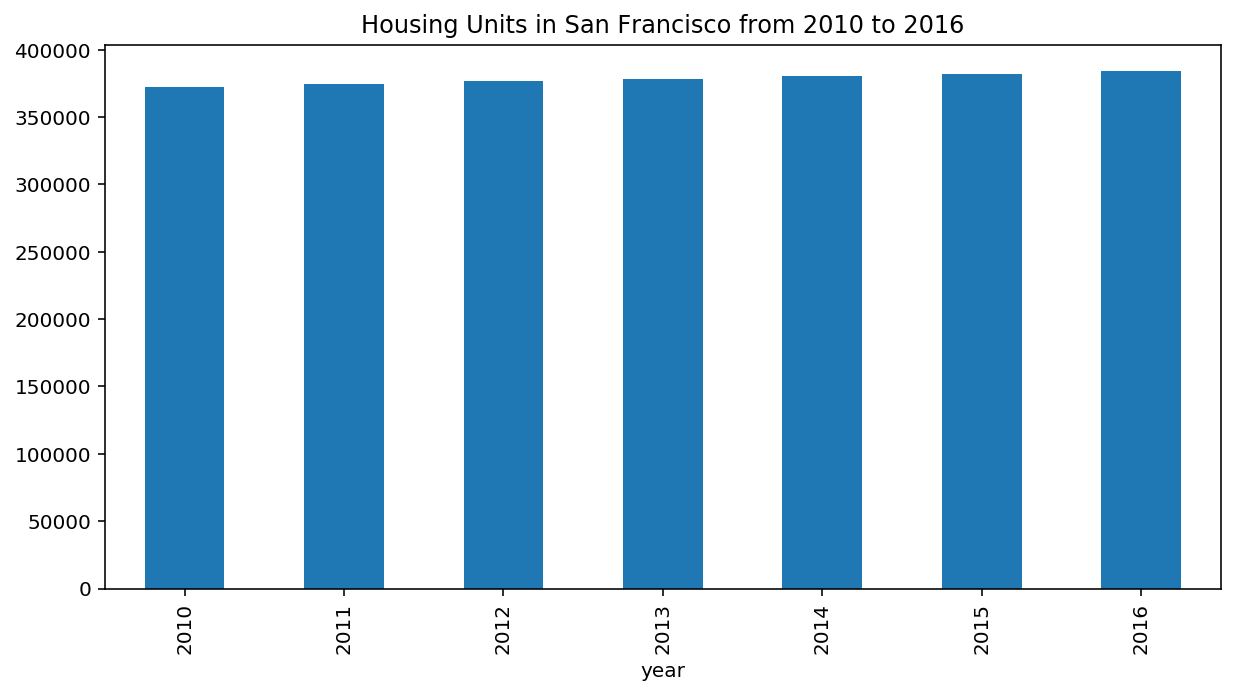

In [276]:
#"## Real Estate Analysis of San Francisco from 2010 to 2016",
#Yearly analysis
row = pn.Row("## Real Estate Analysis of San Francisco from 2010 to 2016", pane_one, pane_two, pane_three)
row

In [277]:
#Neighborhood column
by_neighborhood=pn.Column("## Real Estate Analysis of San Francisco from 2010 to 2016", average_price_by_neighborhood(),top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales())
by_neighborhood

Column
    [0] Markdown(str)
    [1] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()
    [2] HoloViews(Bars)
    [3] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
            [1] VSpacer()

In [278]:
#parallel
parallels=pn.Column("## Real Estate Analysis of San Francisco from 2010 to 2016", parallel_categories(), parallel_coordinates())
parallels

Column
    [0] Markdown(str)
    [1] Plotly(Figure)
    [2] Plotly(Figure)

In [279]:
#sunburst
sunburst_plot=pn.Row("## Real Estate Analysis of San Francisco from 2010 to 2016", sunburst())
sunburst_plot

Row
    [0] Markdown(str)
    [1] Plotly(Figure)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure, hover_data={'points': [{'curveNumber'...}, relayout_data={'mapbox.center': {'lon': ...})
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [2] Row
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
        [2] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
        [3] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
        [2] Plotly(Figure, relayout_data={'autosize': True})
    [4] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
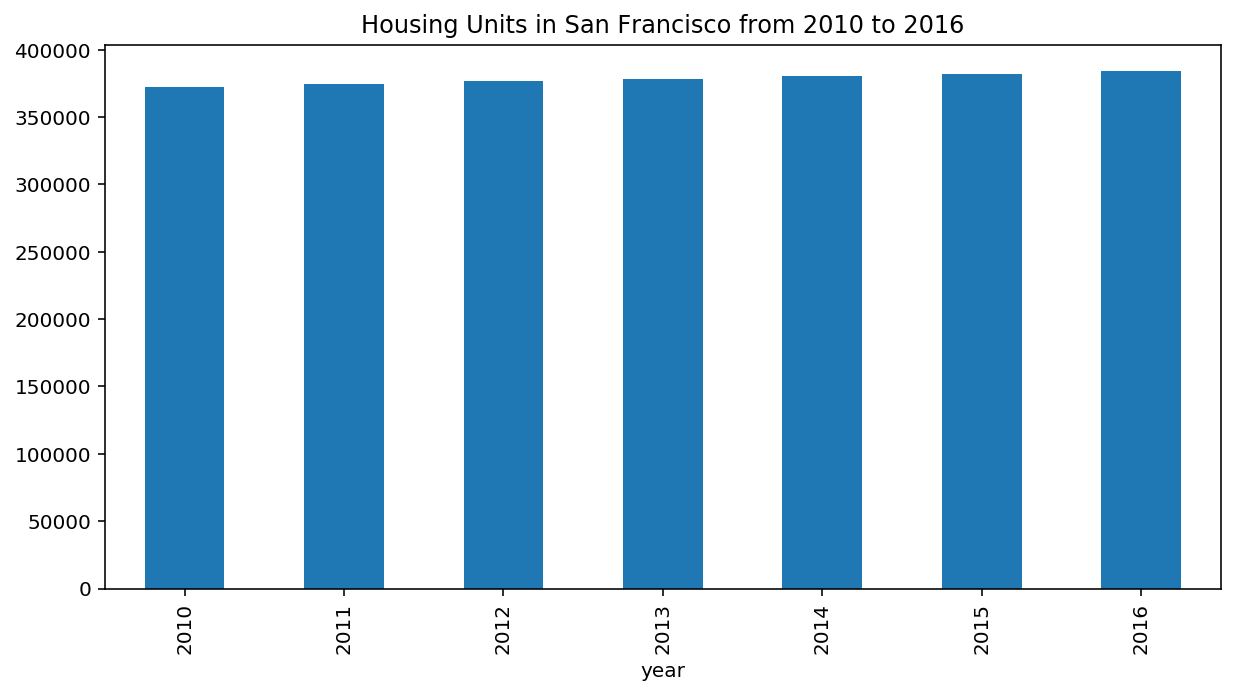

In [280]:
# Create the dashboardy
tabs =pn.Tabs(
    ("Welcome", column_map),
    ("Neighborhood", by_neighborhood),
    ("Yearly", row), 
    ("Parallel", parallels),
    ("Sunburst", sunburst_plot)
)
tabs

## Serve the Panel Dashboard

http://localhost:5006/dashboard

Tabs(active=4)
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure, hover_data={'points': [{'curveNumber'...}, relayout_data={'autosize': True})
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [2] HoloViews(Bars)
        [3] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
    [2] Row
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, tight=True)
        [2] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
        [3] Plotly(Figure, viewport={'xaxis.range': [2010, ...})
    [3] Column
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
        [2] Plotly(Figure, relayout_data={'autosize': True})
    [4] Row
        [0] Markdown(str)
        [1] Plotly(Figure, relayout_data={'autosize': True})
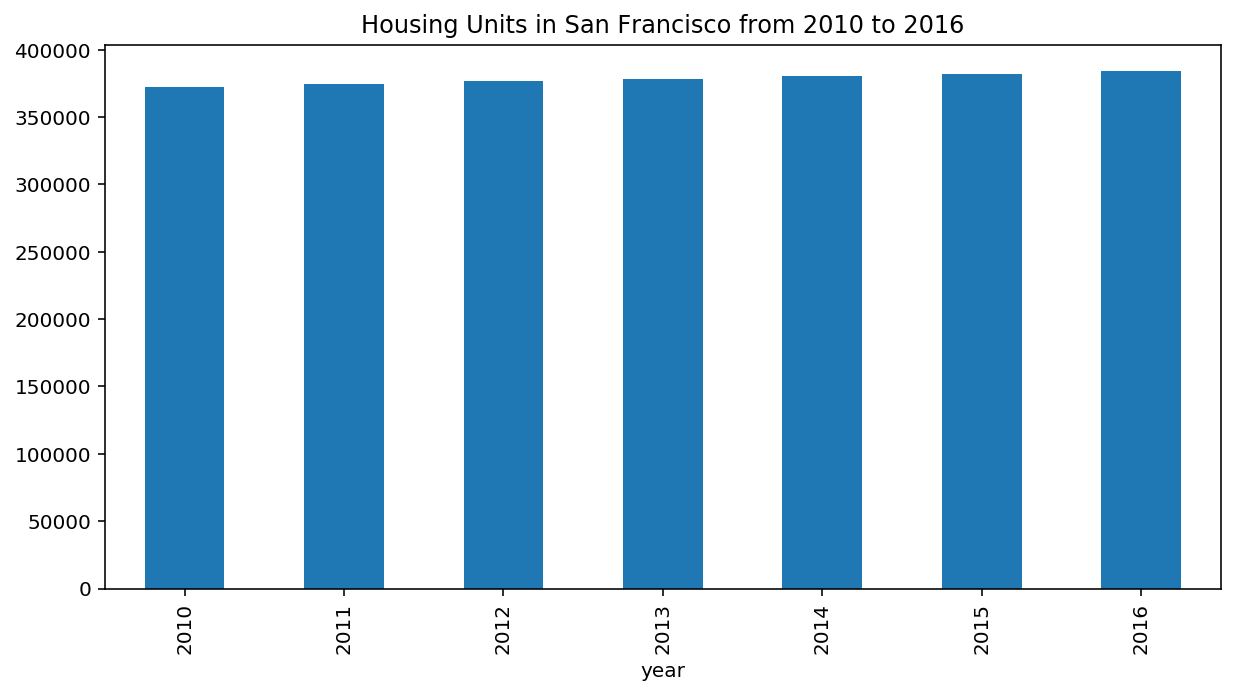

In [281]:
# Serve the# dashboard
tabs.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

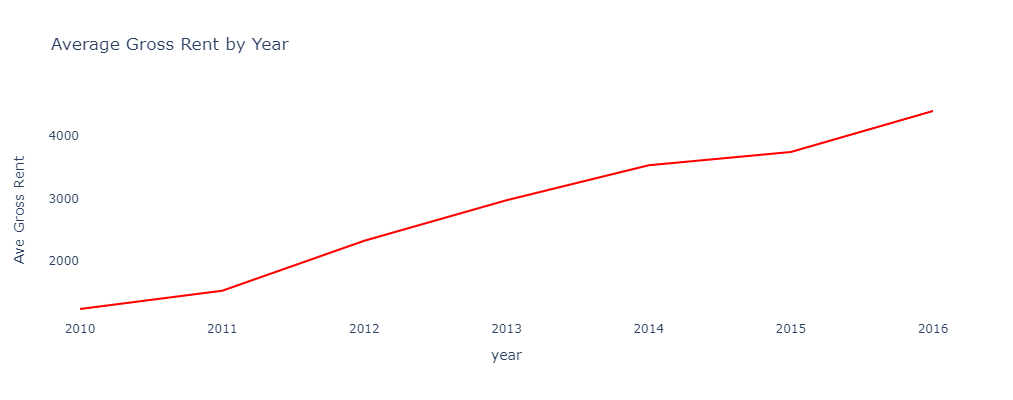

In [284]:
fig_rent

Matplotlib(Figure, tight=True)
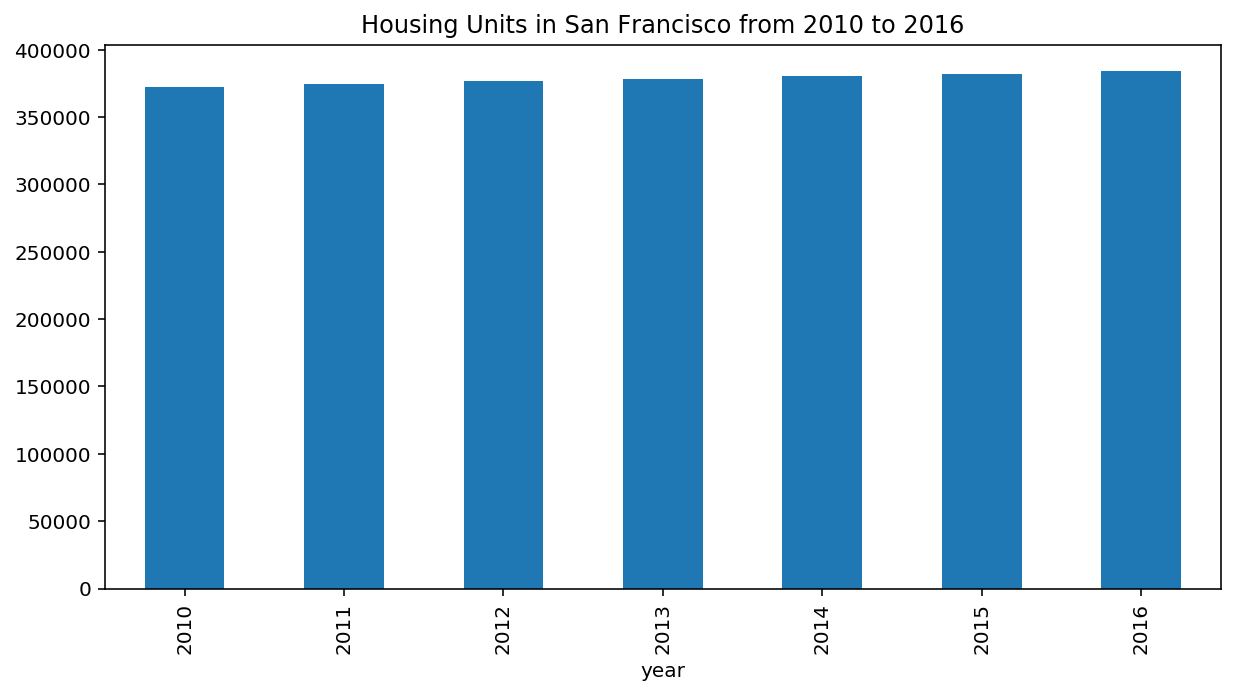

In [282]:
housing_units_per_year()

In [268]:
fig_sales

<Figure size 432x288 with 0 Axes>

In [285]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [286]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [287]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [130]:
neighborhood_map().show()

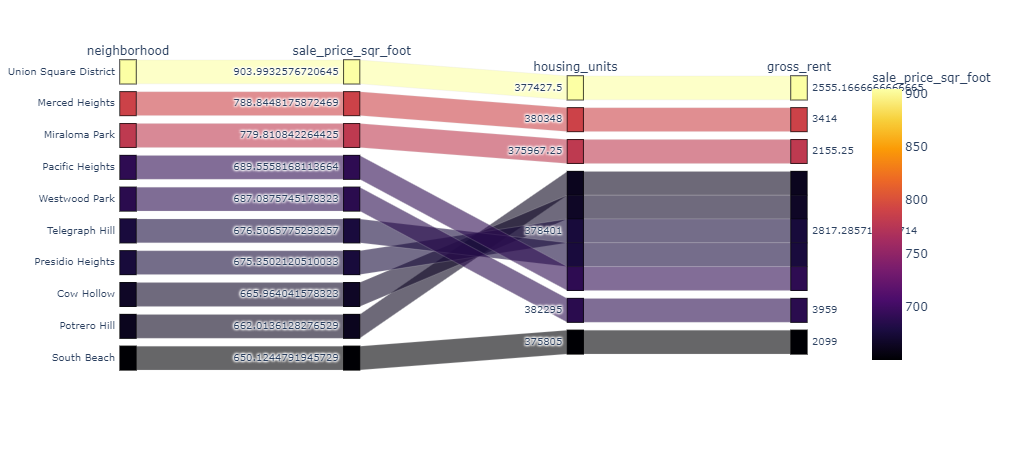

In [288]:
parallel_categories()

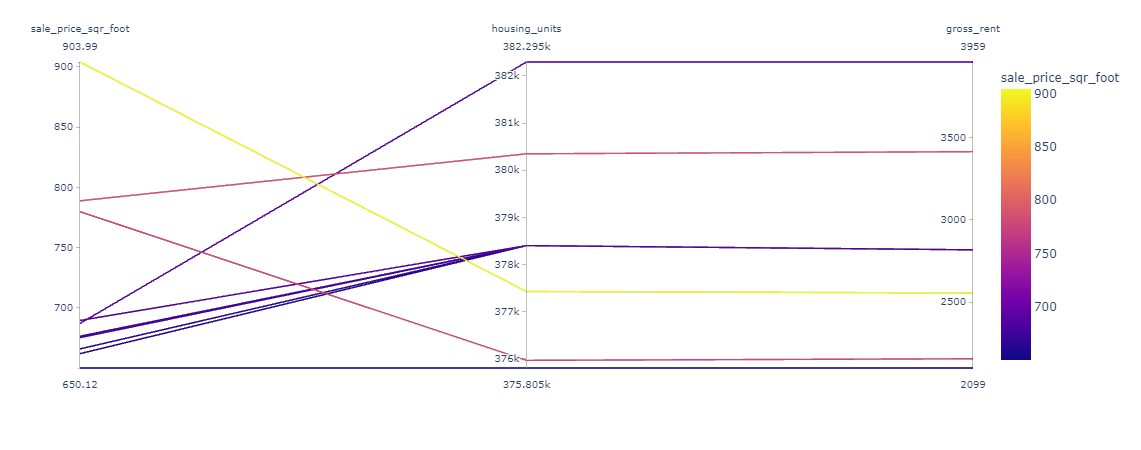

In [289]:
parallel_coordinates()

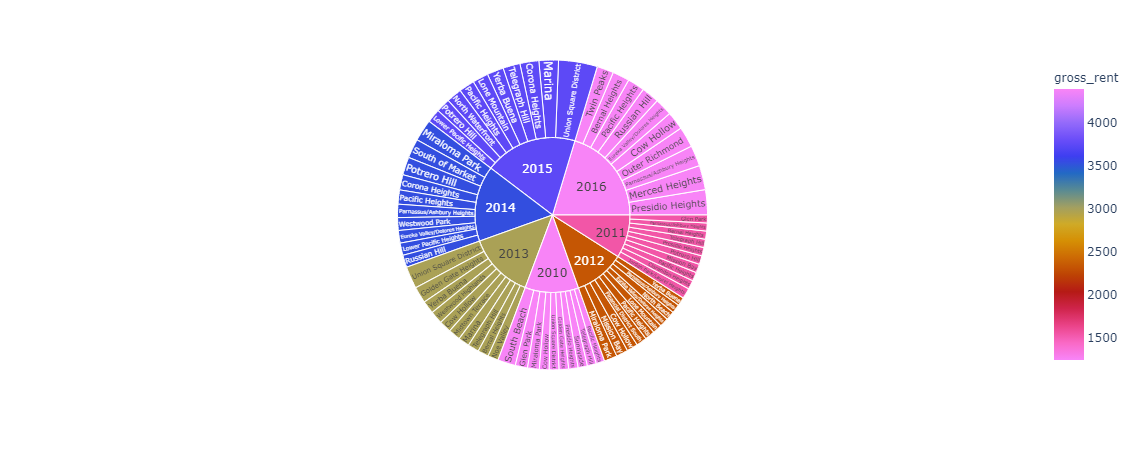

In [290]:
sunburst()

In [104]:
neighborhood_map()

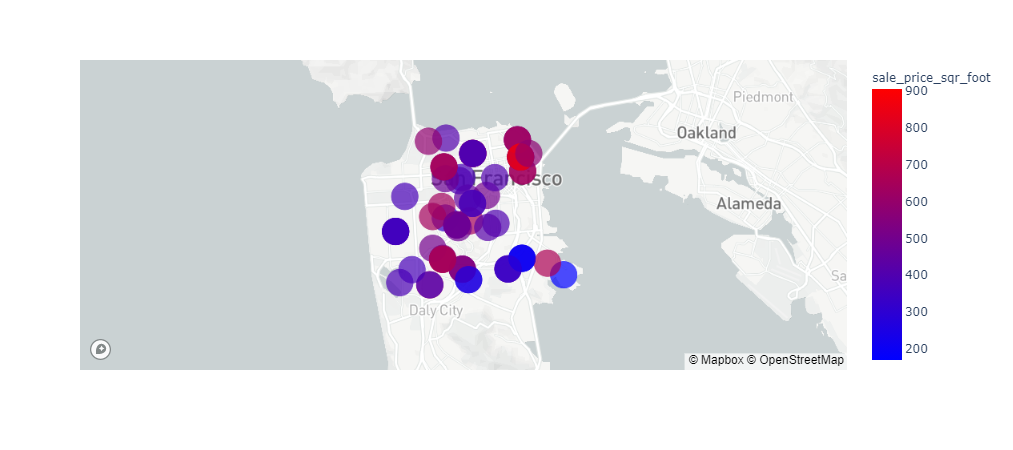

In [291]:
neighborhood_map()